<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Statistics_For_Astronomers_20230828.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

#### Let's use the Bernoulli distribution as an example to inspect the various methods available in the `scipy.stats` packages.

In [17]:
p = 0.25 # probabilty of one success in one trial
# The population mean and variance in terms of p
mean_th = p
var_th = p * (1-p)
print(f"Population mean: {mean_th}")
print(f"Population variance: {var_th}")

Population mean: 0.25
Population variance: 0.1875


##### We can compute expectation values for various moments and for arbitrary functions of a Bernoulli distribution

In [25]:
# The first four moments
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print(f"First four moments: {mean, var, skew, kurt}")
# What should p be for the skew to be zero?

# Verify that the expectation value of x**2 is correctly computed
def func(x):
  return x**2
print(f"Expectation value of x**2: {bernoulli.expect(func, args=(p,))}")
print(f"Theoretical value: {var_th + mean_th**2}")

First four moments: (0.25, 0.1875, 1.1547005383792515, -0.6666666666666665)
Expectation value of x**2: 0.25
Theoretical value: 0.25


In [31]:
# Generate N random variates (`rvs`) from this distribution
N = 10
x = bernoulli.rvs(p, size=N)
print(f"{N} random deviates: {x}")
# Remember, these methods are vectorisable!
# x = bernoulli.rvs(p, size=(N, 5)) # will result in an (N, 5) array of variates

# Compare the sample mean and sample variance to the population values
print(f"sample mean / population mean = {x.mean()}/{mean_th} = {np.round(x.mean() / mean_th, decimals=2)}")
print(f"sample variance / population variance = {x.var()}/{var_th} = {np.round(x.var() / var_th, decimals=2)}")

10 random deviates: [0 0 0 0 0 0 0 0 0 0]
sample mean / population mean = 0.0/0.25 = 0.0
sample variance / population variance = 0.0/0.1875 = 0.0


#### If you're sick of having to specify the parameters of the distribution all the time, you can create a "frozen object" with the parameters held fixed.

In [38]:
bern_distrib = bernoulli(p)

#### Subsequently, you can use all the methods available to this object

In [39]:
bern_distrib.mean()
bern_distrib.var()
bern_distrib.rvs(size=N)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

#### This is a discrete distribution, so it only has valid PMF at integral values. The CDF, therefore, also increases only at integral values.


#### let's compute and display the PMF/CDF. For the CDF, note the usage of `plt.step` and the `post` option for its `where` argument.

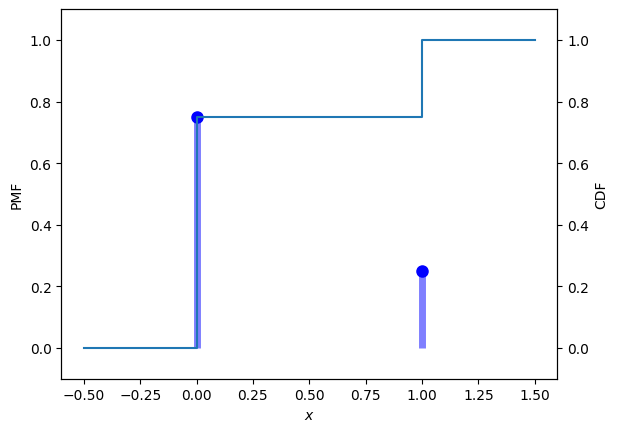

In [62]:
xfull = np.array([-0.5, 0.0, 1.0, 1.5])
x = np.array([0, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(x, bern_distrib.pmf(x), 'bo', ms=8)
ax.vlines(x, 0, bern_distrib.pmf(x), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('PMF')
ax.set_ylim(-0.1, 1.1)
ax2 = plt.twinx()
ax2.step(xfull, bern_distrib.cdf(xfull), where='post')
ax2.set_ylabel('CDF')
ax2.set_ylim(-0.1, 1.1)
plt.show()

#### The inverse of the CDF, the quantile function, is also called the percentile point function (PPF). The `ppf` method can be used to print out its values.

#### Because the Bernoulli CDF only changes at integral values, the PPF will only return integral values

#### Let us interpret the output of the following together!

In [71]:
print(bern_distrib.ppf(0.0))
print(bern_distrib.ppf(1.0))

print(bern_distrib.ppf(-0.5))
print(bern_distrib.ppf(3.5))

# print(bern_distrib.ppf(q)) # What should q be so that this returns 0?

-1.0
1.0
nan
nan
0.0


[The median of the Bernoulli distribution is tricky...](https://wikimedia.org/api/rest_v1/media/math/render/svg/482cc0f5f8c739e3fe2462d72ee5b9f1f7b5d5a4) because the result has to be an integer.

In [73]:
# The median of the Bernoulli distribution
print(bern_distrib.ppf(0.5))
bern_distrib.median()

0.0


0.0